This is a Test Designed to test your Machine Learning and Algorithms Knowledge, 
Alog with vizualization.

In [13]:
pip install tensorflow-macos

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 46.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.1/22.1 MB 23.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 49.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 22.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [14]:
pip install tensorflow-metal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3604208075.py, line 2)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

ModuleNotFoundError: No module named 'tensorflow'

In [9]:
from tqdm import tqdm

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
classes = ['0', '1', '2','3', '4','5', '6', '7', '8', '9']
nclasses = len(classes)

In [4]:
#split Train Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9,
                                     train_size=0.7, test_size=0.3)

In [5]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [10]:
#clf = (#Implement a logistic regression) 
#implement a logistic regression
clf = LogisticRegression(solver = 'saga', multi_class='multinomial').fit(X_train_scaled, y_train)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [11]:
accuracy = clf.score(X_test_scaled, y_test)

In [ ]:
#implement a convolutional neural network
import tensorflow as tf
from tensorflow import keras

#reshape the data
X_train_reshaped = np.array(X_train_scaled).reshape(-1,28,28,1)
X_test_reshaped = np.array(X_test_scaled).reshape(-1,28,28,1)

# encode y as integers
y_train_encoded = np.array([int(i) for i in y_train])

#build the model
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#compile the model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


#train the model
model.fit(X_train_reshaped, y_train_encoded, epochs=10)


In [ ]:
#evaluate the model
y_test_encoded = np.array([int(i) for i in y_test])
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_encoded, verbose=2)

In [1]:
#implement a convolutional neural network
import tensorflow as tf
from tensorflow import keras

#reshape the data
X_train_reshaped = np.array(X_train_scaled).reshape(-1,28,28,1)
X_test_reshaped = np.array(X_test_scaled).reshape(-1,28,28,1)

#build the model
model = keras.Sequential([
    keras.layers.Conv2D(24, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(48, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

#compile the model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#train the model
model.fit(X_train_reshaped, y_train, epochs=10)

#evaluate the model
model.evaluate(X_test_reshaped, y_test, verbose=2)

#predict the first 4 images in the test set
model.predict(X_test_reshaped[:4])

#check the predictions against the true values
y_pred = model.predict_classes(X_test_reshaped)
y_pred[:4]
y_test[:4]

#plot the first 4 images as subplots
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title('True label: %s Predicted: %s' % (y_test[i], y_pred[i]), fontsize = 12)
    plt.axis('off')
plt.tight_layout()
plt.show()

#plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')




ModuleNotFoundError: No module named 'tensorflow'

In [8]:
#print out the accuracy
print("Accuracy: ", accuracy)

Accuracy:  0.9209047619047619


Q.1 How can the Accuracy be Improved

**Create a test image**

On a plain white piece of paper, in a black or other dark-colored pen or pencil, write a digit of your choice from 0 to 9. Take a photo of your handwritten digit.

Edit your photo (crop, rotate as needed), using a photo editor of your choice , so that your photo is approximately square, and includes only the digit and the white background. Leave a small margin around the edge of the writing, but not too much. Your edited photo should look similar to the MNIST images in the demo notebook.

For example: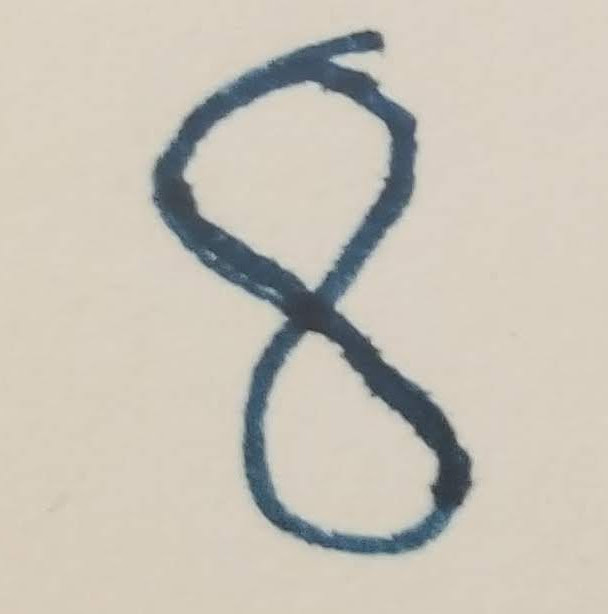

In [8]:
#upload it to the notebook
#import the image
import PIL.ImageOps
import requests
from PIL import Image
# vizulize the image
url = 'https://i.imgur.com/1Q1ZQYz.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)


from PIL import Image
 
filename = '...'
 
image = Image.open(filename)
p = plt.imshow(np.asarray(image), cmap=plt.cm.gray,);
p = plt.title('Shape: ' + str(np.asarray(image).shape))

ModuleNotFoundError: No module named 'requests'

The images in MNIST have been pre-processed - they are converted to grayscale, and centered in a 28x28 image by computing the center of mass of the pixels, and then translating and scaling the image so as to position this point at the center of the 28x28 field.

You have already done some manual pre-processing, by cropping your image before uploading. But you may have noticed from the shape output that your image resolution is much larger than 28x28, and you probably had three color channels (red, green, and blue).

You may have to manually tune the contrast for best results, by changing the pixel_filter value. You will want the background to be as close to pure black as possible, without affecting the legibility of the handwritten digit.

(We won't require with centering the image, but that would probably improve the prediction performance)

In [ ]:
#preprocess the image

In [ ]:
# convert to grayscale image - 'L' format means each pixel is 
# represented by a single value from 0 to 255
# resize image 
# invert image, to match training data
# adjust contrast and scale
# finally, reshape to (1, 784) - 1 sample, 784 features

image_bw = image.convert('L')
image_bw_resized = image_bw.resize((28,28), Image.ANTIALIAS)
image_bw_resized_inverted = PIL.ImageOps.invert(image_bw_resized)
pixel_filter = 20
min_pixel = np.percentile(image_bw_resized_inverted, pixel_filter)
image_bw_resized_inverted_scaled = np.clip(image_bw_resized_inverted-min_pixel, 0, 255)
max_pixel = np.max(image_bw_resized_inverted)
image_bw_resized_inverted_scaled = np.asarray(image_bw_resized_inverted_scaled)/max_pixel
test_sample = np.array(image_bw_resized_inverted_scaled).reshape(1, 784)




In [ ]:
# Plot image after pre-processing
p = plt.imshow(image_bw_resized_inverted_scaled, cmap=plt.cm.gray,)
p = plt.title('Shape: ' + str(image_bw_resized_inverted_scaled.shape))


In [ ]:
#then run logistic Regression 
test_pred = clf.predict(test_sample)
print("Predicted class is: ", test_pred)

In [ ]:
#plot a graph showing probability of classes like its shown below

#plot the probability of each class as a bar graph
plt.figure(figsize=(10,7))
plt.bar(range(10), clf.predict_proba(test_sample)[0], tick_label=range(10))
plt.xlabel('Class')
plt.ylabel('Probability')
plt.show()


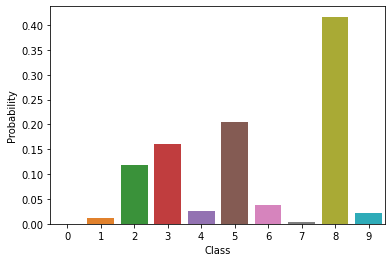

##**Q2 Explain the model prediction**

Even if the fitted model correctly labeled your handwritten digit, it may have estimated a moderately high probability for some of the other labels. Therefore Vizualize 

⟨𝑤𝑘,𝑥⟩ 

for each class  𝑘 .

Add a Cell that will plot:

on the top row, the coefficient vector for each class,
on the bottom row, each pixel in your test image, multiplied by the associated coefficient for that class.


It should look like the image below

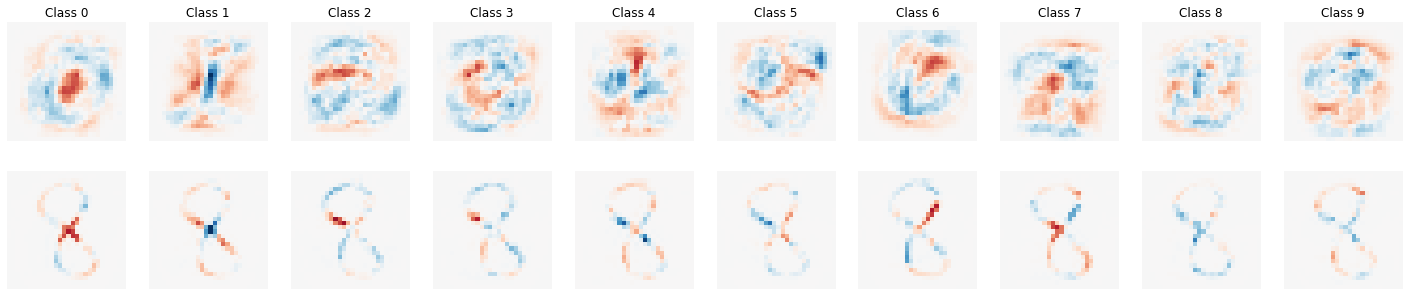

If you got a correct label, draw and then upload an image that you would think the regression will label incorrectly, and complete the steps above. 

If you get an incorrect label, try drawing one more time and then doing the steps again.



In [ ]:
# plot on the top row, the coefficient vector for each class, on the bottom row, each pixel in your test image, multiplied by the associated coefficient for that class.
# plot the coefficient vector for each class
plt.figure(figsize=(10,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(clf.coef_[i].reshape(28,28), cmap='gray')
    plt.title('Class %s' % i)
    plt.axis('off')
plt.tight_layout()
plt.show()

# plot each pixel in your test image, multiplied by the associated coefficient for that class.
plt.figure(figsize=(10,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(test_sample.reshape(28,28)*clf.coef_[i].reshape(28,28), cmap='gray')
    plt.title('Class %s' % i)
    plt.axis('off')
plt.tight_layout()
plt.show()

# plot on the top row, the coefficient vector for each class, on the bottom row, each pixel in your test image, multiplied by the associated coefficient for that class.
plt.figure(figsize=(10,7))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(clf.coef_[i].reshape(28,28), cmap='coolwarm')
    plt.title('Class %s' % i)
    plt.axis('off')
    plt.subplot(2, 10, i+11)
    plt.imshow(test_sample.reshape(28,28)*clf.coef_[i].reshape(28,28), cmap='coolwarm')
    plt.title('Class %s' % i)
    plt.axis('off')
plt.tight_layout()
plt.show()



**What to submit**

In a pdf file (for your two handwritten digit samples, not this example):

1.The visualization of your test image before pre-processing.

2.The visualization of your test image after pre-processing.

3.The bar plot showing the conditional probabilities per class for your test image.

4.The predicted class label for your test image.

5.The figure from the "Explain the model prediction" section.

6.In your own words, list the classes for which the logistic regression predicted a high or moderately high probability. Using the figure from the "explain the model prediction" section, explain why the logistic regression estimates that these classes are very likely or moderately likely.

7.Explain: how did you know what changes to make to your original drawing to create a modified version that would get a different predicted class label?

#Part 2 implement a multi layer CNN

#Implement a multi layer CNN and train MNIST data, then get the accuracy on test data. 
Then do the same steps, get the output for your sample image

You can use libraries like tensorflow, pytorch. However building it from the ground up is better.

And also vizualize why CNN is better or worse in your own way. 

In [ ]:
#implement a multi layer convolutional neural network

